In [508]:
###libraries importing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [509]:
import warnings
warnings.filterwarnings("ignore")

In [510]:
tra_data=pd.read_csv(r"/content/train.csv")##train
tra_label=pd.read_csv(r"/content/train_label.csv",names=["labels"],header=None)
tst_data=pd.read_csv(r"/content/test.csv")##test
tst_label=pd.read_csv(r"/content/test_label.csv",names=["labels"],header=None)

In [511]:
tra_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [512]:
df1 = pd.concat([tra_data, tra_label],axis =1).copy()###train data

In [513]:
df2 = pd.concat([tst_data, tst_label],axis =1).copy()###test data

In [514]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,labels
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [515]:
df2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,labels
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


In [516]:
df1.dtypes####data types of train data

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
labels          int64
dtype: object

In [517]:
df1.shape#####shape of train data

(8708, 10)

In [518]:
df2.shape#####shape of test data

(2178, 10)

In [519]:
df2.dtypes

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
labels          int64
dtype: object

In [520]:
##  check the Missing value in the dataset
df1.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
labels        0
dtype: int64

In [521]:
##  check the Missing value in the dataset
df2.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
labels        0
dtype: int64

In [522]:
##Create new columns date, hour,weekDay,monthfrom datetimecolumn
df1['month'] = pd.to_datetime(df1.datetime, format='%m/%d/%Y %H:%M').dt.month_name()

df1['weekday'] = pd.to_datetime(df1.datetime, format='%m/%d/%Y %H:%M').dt.day_name()

df1['hour'] = pd.DatetimeIndex(df1['datetime']).hour
df1['date'] = pd.DatetimeIndex(df1['datetime']).year

df1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,labels,month,weekday,hour,date
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,May,Wednesday,19,2012
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,September,Wednesday,4,2012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,January,Thursday,9,2011
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,November,Friday,16,2011
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,September,Tuesday,13,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,January,Monday,6,2012
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,November,Thursday,1,2011
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,April,Tuesday,3,2011
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,November,Wednesday,1,2012


In [523]:
##Create new columns date, hour,weekDay,monthfrom datetimecolumn
df2['month'] = pd.to_datetime(df2.datetime, format='%m/%d/%Y %H:%M').dt.month_name()

df2['weekday'] = pd.to_datetime(df2.datetime, format='%m/%d/%Y %H:%M').dt.day_name()

df2['hour'] = pd.DatetimeIndex(df2['datetime']).hour
df2['date'] = pd.DatetimeIndex(df2['datetime']).year

df2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,labels,month,weekday,hour,date
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,May,Thursday,11,2012
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,June,Saturday,7,2012
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,March,Sunday,20,2011
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,October,Thursday,11,2011
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,June,Saturday,12,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,March,Thursday,3,2012
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144,January,Thursday,12,2012
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159,March,Wednesday,22,2012
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29,May,Thursday,5,2011


In [524]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,labels,month,weekday,hour,date
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,May,Wednesday,19,2012
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,September,Wednesday,4,2012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,January,Thursday,9,2011
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,November,Friday,16,2011
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,September,Tuesday,13,2011


In [525]:
df1['season'] = df1['season'].astype('category')###Coerce the datatype of season,holiday,workingday,and weatherto category

In [526]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    8708 non-null   object  
 1   season      8708 non-null   category
 2   holiday     8708 non-null   int64   
 3   workingday  8708 non-null   int64   
 4   weather     8708 non-null   object  
 5   temp        8708 non-null   float64 
 6   atemp       8708 non-null   float64 
 7   humidity    8708 non-null   int64   
 8   windspeed   8708 non-null   float64 
 9   labels      8708 non-null   int64   
 10  month       8708 non-null   object  
 11  weekday     8708 non-null   object  
 12  hour        8708 non-null   int64   
 13  date        8708 non-null   int64   
dtypes: category(1), float64(3), int64(6), object(4)
memory usage: 893.2+ KB


In [527]:
df2[['season','holiday','workingday','weather']] =df2[['season','holiday','workingday','weather']].astype('category')###Coerce the datatype of season,holiday,workingday,and weatherto category

In [528]:
df1[['holiday','workingday','weather']] =df1[['holiday','workingday','weather']].astype('category')##oerce the datatype of season,holiday,workingday,and weatherto category

In [529]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    2178 non-null   object  
 1   season      2178 non-null   category
 2   holiday     2178 non-null   category
 3   workingday  2178 non-null   category
 4   weather     2178 non-null   category
 5   temp        2178 non-null   float64 
 6   atemp       2178 non-null   float64 
 7   humidity    2178 non-null   int64   
 8   windspeed   2178 non-null   float64 
 9   labels      2178 non-null   int64   
 10  month       2178 non-null   object  
 11  weekday     2178 non-null   object  
 12  hour        2178 non-null   int64   
 13  date        2178 non-null   int64   
dtypes: category(4), float64(3), int64(4), object(3)
memory usage: 179.3+ KB


In [530]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    8708 non-null   object  
 1   season      8708 non-null   category
 2   holiday     8708 non-null   category
 3   workingday  8708 non-null   category
 4   weather     8708 non-null   category
 5   temp        8708 non-null   float64 
 6   atemp       8708 non-null   float64 
 7   humidity    8708 non-null   int64   
 8   windspeed   8708 non-null   float64 
 9   labels      8708 non-null   int64   
 10  month       8708 non-null   object  
 11  weekday     8708 non-null   object  
 12  hour        8708 non-null   int64   
 13  date        8708 non-null   int64   
dtypes: category(4), float64(3), int64(4), object(3)
memory usage: 715.0+ KB


In [531]:
df1 =df1.drop('datetime' ,axis =1)####Drop the datetimecolumn as we have already extracted useful features from i

In [532]:
df2 =df2.drop('datetime' ,axis =1)#####Drop the datetimecolumn as we have already extracted useful features from i

In [533]:
df1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,labels,month,weekday,hour,date
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,May,Wednesday,19,2012
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,September,Wednesday,4,2012
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,January,Thursday,9,2011
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,November,Friday,16,2011
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,September,Tuesday,13,2011


In [534]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      8708 non-null   category
 1   holiday     8708 non-null   category
 2   workingday  8708 non-null   category
 3   weather     8708 non-null   category
 4   temp        8708 non-null   float64 
 5   atemp       8708 non-null   float64 
 6   humidity    8708 non-null   int64   
 7   windspeed   8708 non-null   float64 
 8   labels      8708 non-null   int64   
 9   month       8708 non-null   object  
 10  weekday     8708 non-null   object  
 11  hour        8708 non-null   int64   
 12  date        8708 non-null   int64   
dtypes: category(4), float64(3), int64(4), object(2)
memory usage: 647.0+ KB


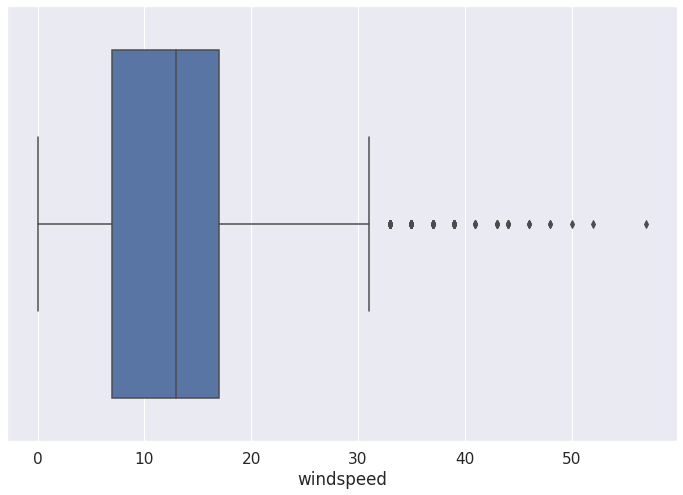

In [535]:
####Plot Box plotsacross various features like season, hour of the day, working_day,etc OUTLIER ANALYSIS
##INFERENCE THERE ARE OUTLIERS PRESENT FOR THE WINDSPEED IN THE RANGE OF 30 TO 50
import seaborn as sns
sns.boxplot(x=df1['windspeed'])

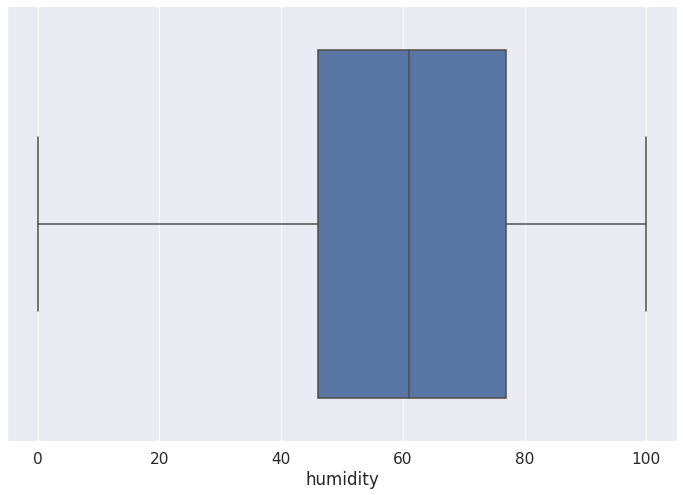

In [536]:
####Plot Box plotsacross various features like season, hour of the day, working_day,etc OUTLIER ANALYSIS
###THERE ARE OUTLIER PRESENT FOR THE COLUMN HUMIDITY 
import seaborn as sns
sns.boxplot(x=df1['humidity'])


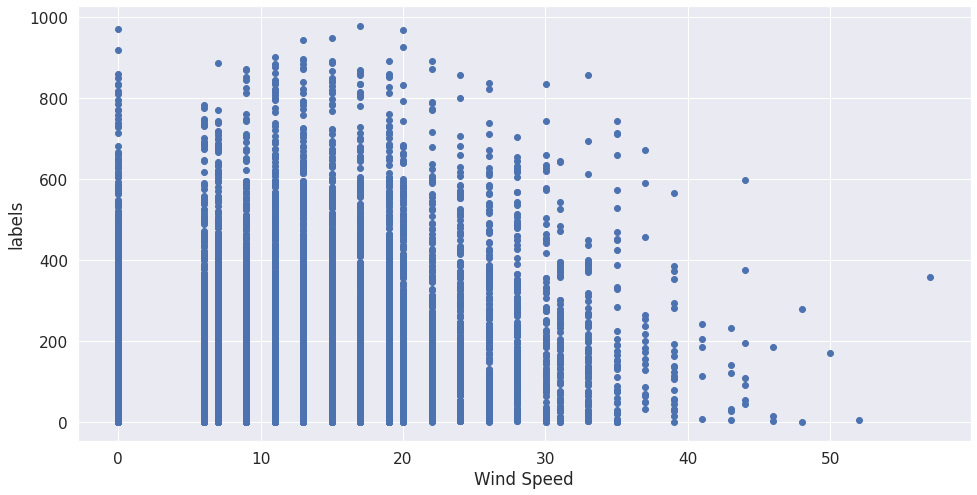

In [538]:
####Plot Box plotsacross various features like season, hour of the day, working_day,etc OUTLIER ANALYSIS
import matplotlib.pyplot as plt
import matplotlib
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['windspeed'], df1['labels'])
ax.set_xlabel('Wind Speed')
ax.set_ylabel('labels')
plt.show()

In [539]:
### REMOVING THE OUTLIERS FOR THE COLUMN TEMP,ATEMP,HUMIDITY,LABELS USING THE Z-SCORE METHOD
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df1[['windspeed','temp','atemp','humidity','labels']]))
print(z)

[[0.50721471 0.24279646 0.24756413 0.79958574 1.71306563]
 [0.75182255 1.08241785 1.13867577 0.90376068 1.03561284]
 [1.11832527 1.85625701 2.06991433 0.60677596 0.29749077]
 ...
 [0.46958048 0.45270181 0.42578646 0.29425114 1.05764634]
 [0.50721471 1.12158829 1.17880269 0.03381379 0.55638433]
 [0.87371743 1.85625701 2.06991433 0.60677596 0.89239513]]


In [540]:
threshold = 3
print(np.where(z > 3))

(array([   5,   27,   30,   52,  156,  257,  279,  288,  325,  343,  510,
        566,  575,  687,  750,  762,  838,  891,  946,  956,  970,  971,
       1008, 1162, 1200, 1243, 1312, 1336, 1357, 1375, 1413, 1446, 1489,
       1561, 1591, 1601, 1675, 1799, 1878, 1894, 1952, 2023, 2065, 2085,
       2116, 2120, 2126, 2184, 2193, 2357, 2386, 2444, 2491, 2550, 2637,
       2663, 2771, 2793, 2800, 2811, 2825, 2878, 2883, 2963, 2976, 3048,
       3055, 3080, 3099, 3101, 3226, 3250, 3304, 3338, 3351, 3374, 3389,
       3441, 3523, 3548, 3595, 3599, 3646, 3733, 3799, 3799, 3816, 3907,
       3915, 3948, 4018, 4148, 4191, 4202, 4211, 4246, 4369, 4417, 4489,
       4604, 4764, 4765, 4766, 4773, 4798, 4841, 4853, 4887, 4888, 4956,
       4980, 5017, 5065, 5125, 5152, 5167, 5247, 5265, 5316, 5359, 5362,
       5410, 5485, 5502, 5531, 5603, 5634, 5651, 5665, 5685, 5703, 5731,
       5862, 5888, 5890, 6009, 6070, 6080, 6143, 6311, 6314, 6347, 6350,
       6401, 6428, 6433, 6583, 6603, 6609, 6610, 6

In [541]:
### REMOVING THE OUTLIERS
df11 = df1[(z < 3).all(axis=1)]
print("Before removing outliers:",df1.shape)
print("after removing outliers:",df11.shape)



Before removing outliers: (8708, 13)
after removing outliers: (8526, 13)


In [542]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8526 entries, 0 to 8707
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      8526 non-null   category
 1   holiday     8526 non-null   category
 2   workingday  8526 non-null   category
 3   weather     8526 non-null   category
 4   temp        8526 non-null   float64 
 5   atemp       8526 non-null   float64 
 6   humidity    8526 non-null   int64   
 7   windspeed   8526 non-null   float64 
 8   labels      8526 non-null   int64   
 9   month       8526 non-null   object  
 10  weekday     8526 non-null   object  
 11  hour        8526 non-null   int64   
 12  date        8526 non-null   int64   
dtypes: category(4), float64(3), int64(4), object(2)
memory usage: 700.0+ KB


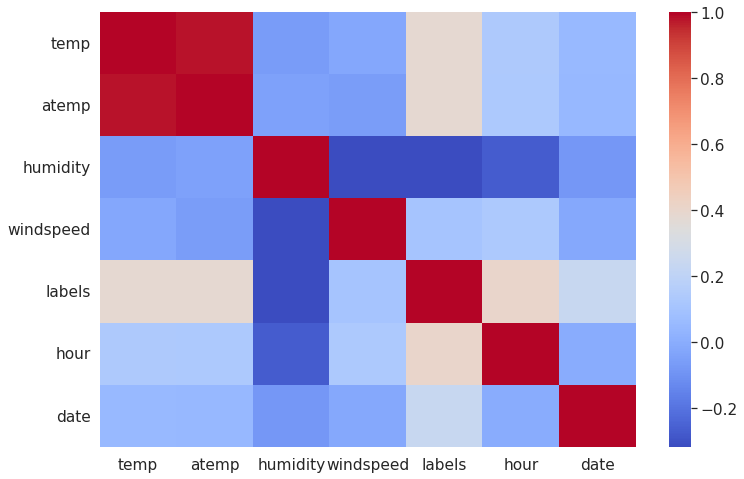

In [543]:
###Plot a correlation plot between "total booking" and ["temp","atemp","humidity","windspeed"]
###inference ) temp and humidity features has got positive and negative correlation with Total_booking respectively.
## Although the correlation between them are not very prominent still the Total_booking variable has got little dependency on "temp" and "humidity".
 ###windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "Total_booking"
###"atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
import seaborn as sns

plt.rcParams['figure.figsize'] =(12,8)
sns.set(font_scale=1.4)
sns.heatmap(df11.corr(), cmap ='coolwarm')

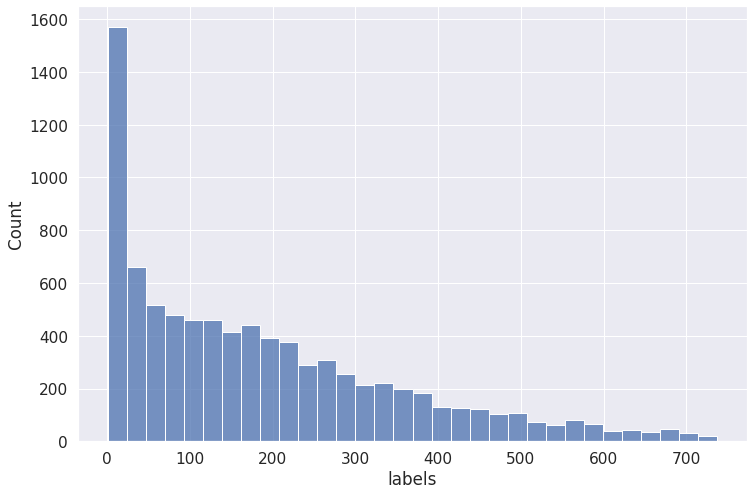

In [544]:
###isualize total_booking vs (Month, Season, Hour, Weekday, Usertype)
import seaborn as sns
sns.histplot(data = df11 , x="labels")

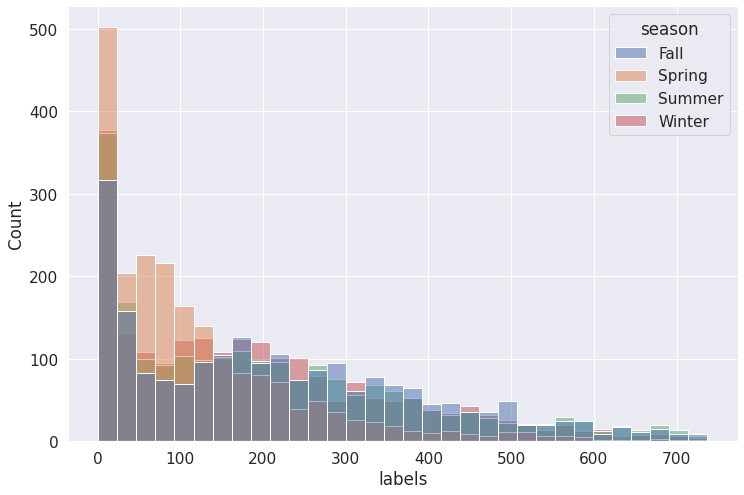

In [545]:
##Histogramsto plot all the continuousvariables present in the data
sns.histplot(data = df11 , x ="labels" , hue = "season")

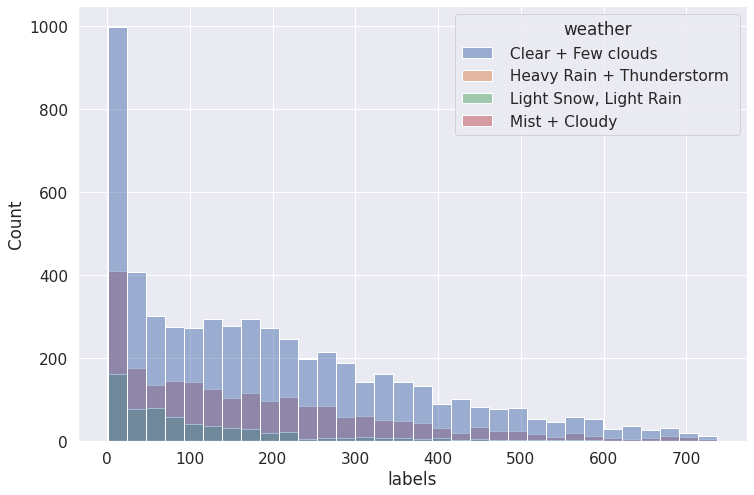

In [546]:
##Histogramsto plot all the continuousvariables present in the data
sns.histplot(data = df11 , x ="labels" , hue = "weather")

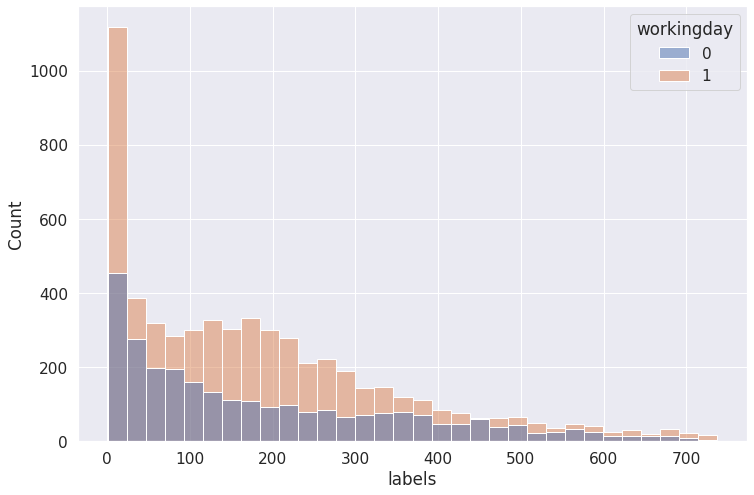

In [547]:
###Histogramsto plot all the continuousvariables present in the data
sns.histplot(data = df11 , x ="labels" , hue = "workingday")

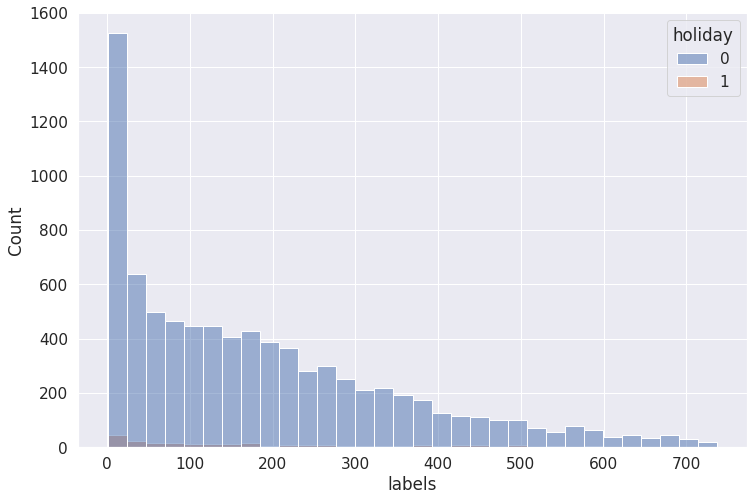

In [548]:
##Histogramsto plot all the continuousvariables present in the data
sns.histplot(data = df11 , x ="labels" , hue = "holiday")

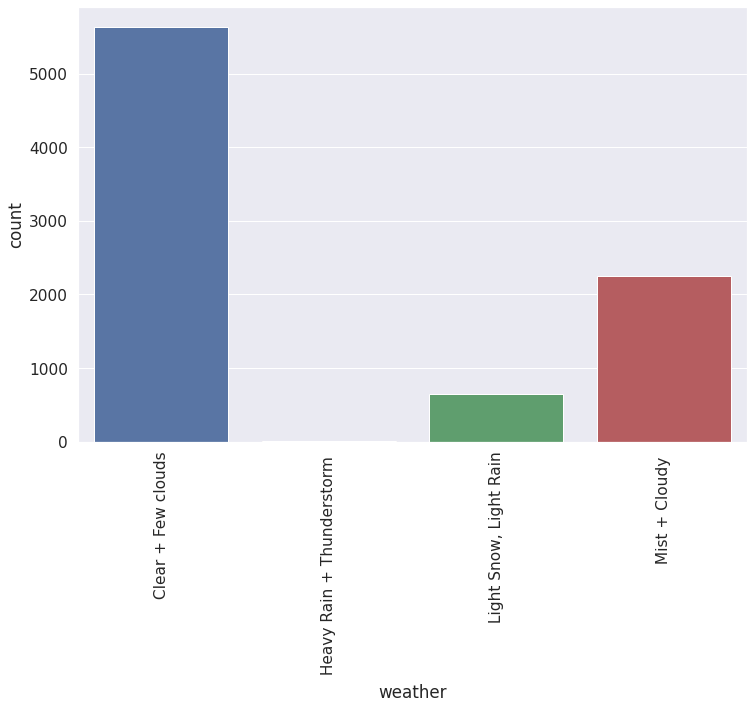

In [549]:
sns.countplot(x='weather',data=df11)
plt.xticks(rotation=90)
plt.show()

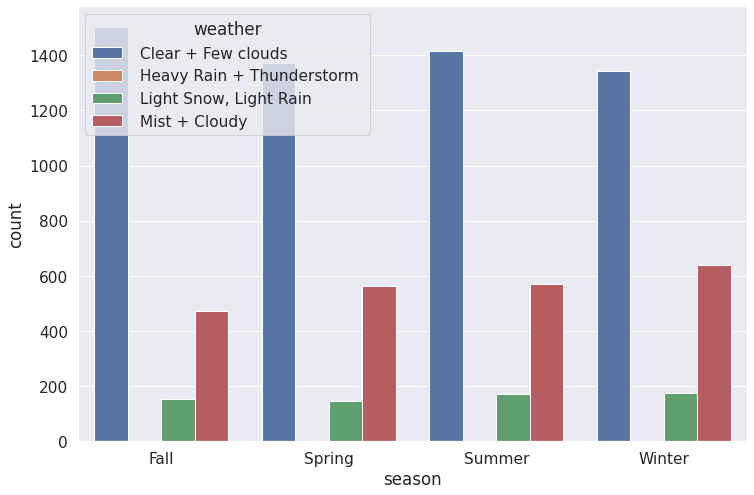

In [550]:
# Show value counts for a season Column and weather Column of dataset df_o:
import seaborn as ns
sns.countplot(x='season',data=df11,hue='weather')
plt.show()

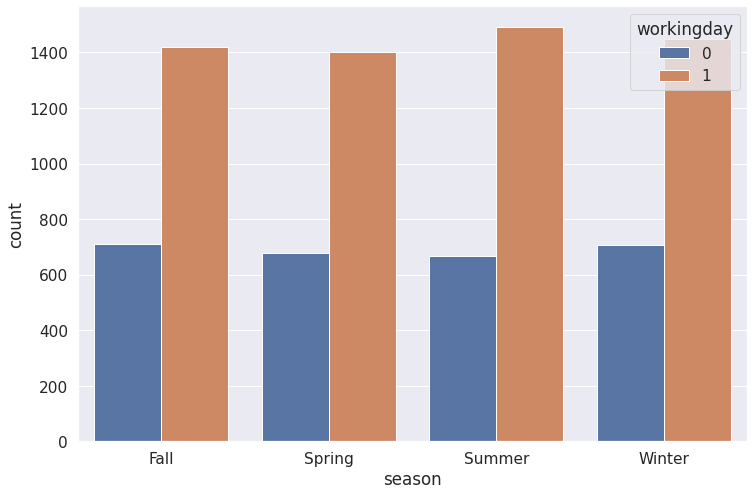

In [551]:
sns.countplot(x='season',data=df11,hue='workingday')
plt.show()

No working and No Holiday =  2516
Total HoliDay =  248
Total Working Day =  5762


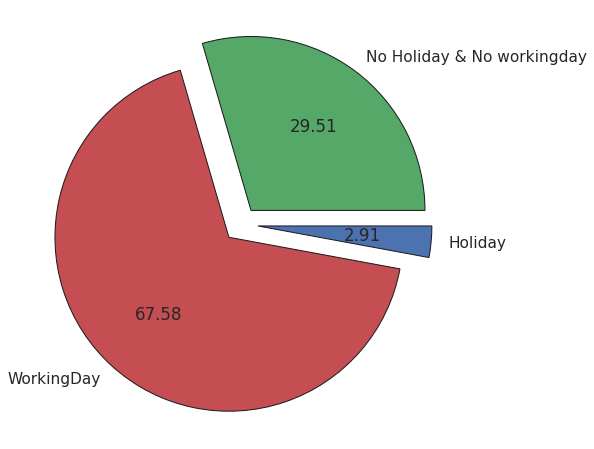

In [552]:
# Visualize distribution of data: total_bookingcolumn and plot the probability distribution plot for the column as wel

Not_Holiday_Not_workingday=df11[(df11.holiday==0) & (df11.workingday==0)].shape[0]
print('No working and No Holiday = ', Not_Holiday_Not_workingday)
Holiday=df11[(df1.holiday==1)].shape[0]
print('Total HoliDay = ', Holiday)
WorkingDay=df11[(df11.workingday==1)].shape[0]
print('Total Working Day = ', WorkingDay)
plt.pie(x=[Not_Holiday_Not_workingday,WorkingDay,Holiday],labels=['No Holiday & No workingday','WorkingDay','Holiday'],explode=(.1,.1,.1),colors=['g','r','b'],autopct='%.2f',wedgeprops={'edgecolor':'k'})
plt.show()

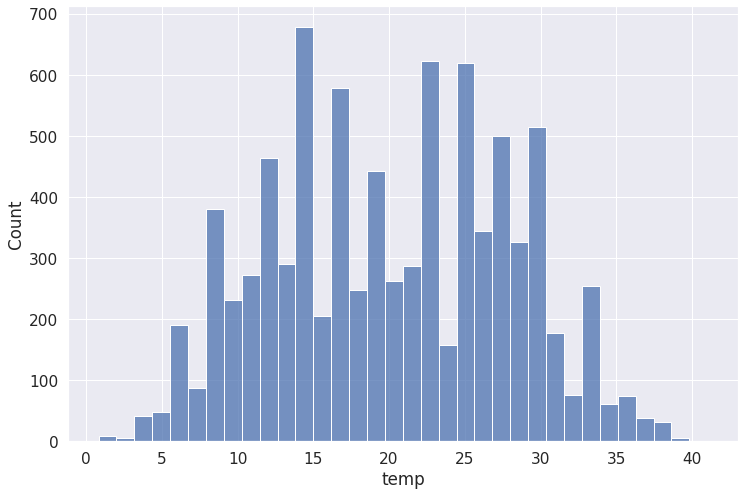

In [553]:
sns.histplot(data = df11 , x = "temp")

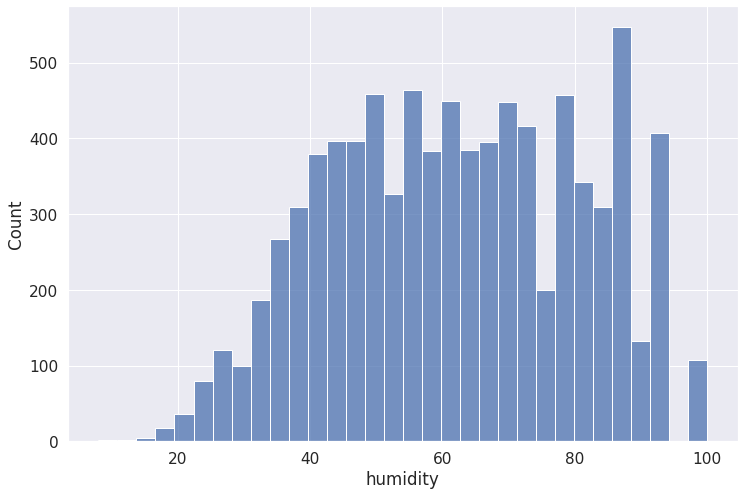

In [554]:
sns.histplot(data = df11 , x = "humidity")

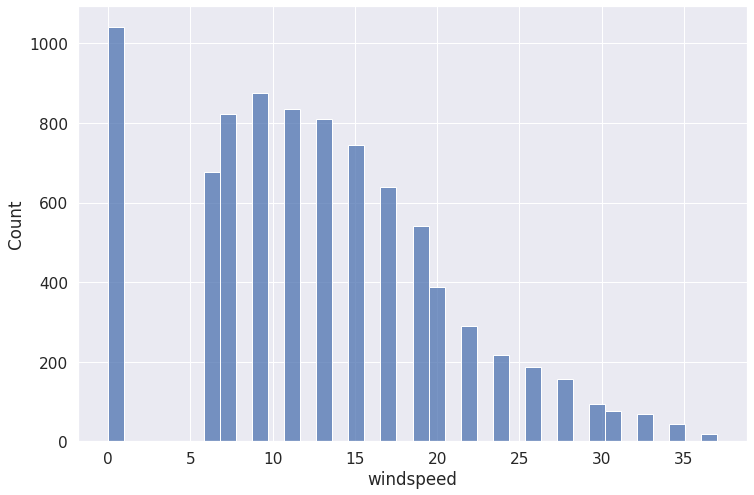

In [555]:
sns.histplot(data = df11 , x = "windspeed")

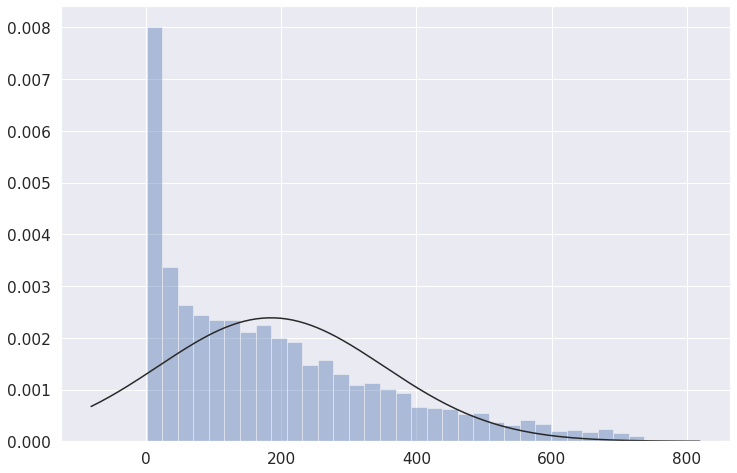

In [556]:
###Visualize distribution of data: total_bookingcolumn and plot the probability distribution plot for the column as wel
from scipy.stats import norm
ax = sns.distplot(x = df11["labels"], fit=norm, kde=False)

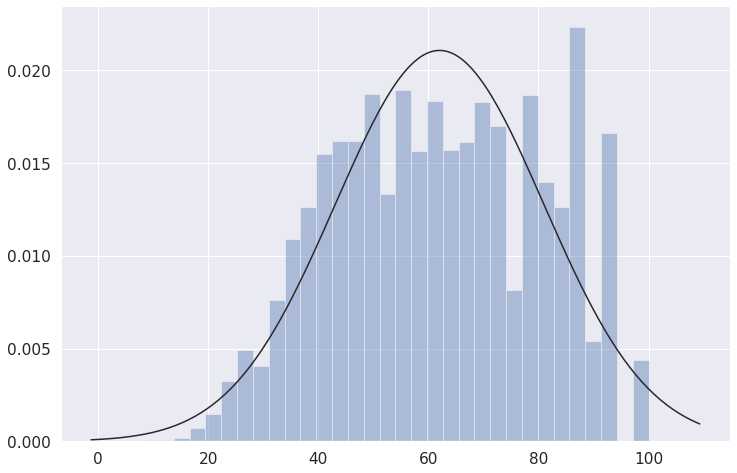

In [557]:
ax = sns.distplot(x = df11["humidity"], fit=norm, kde=False)

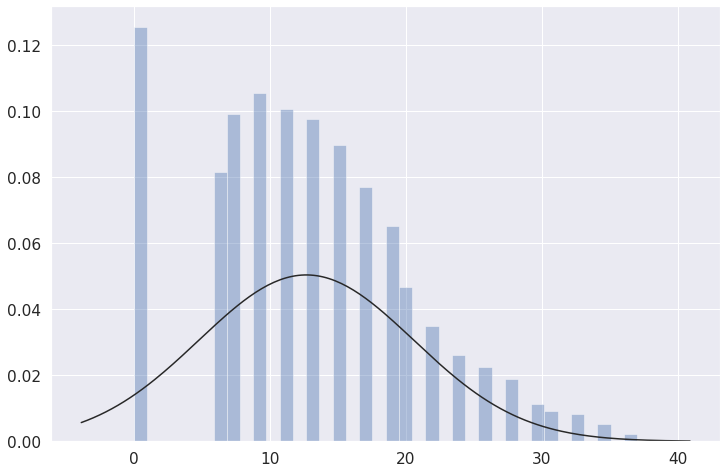

In [558]:
ax = sns.distplot(x = df11["windspeed"], fit=norm, kde=False)

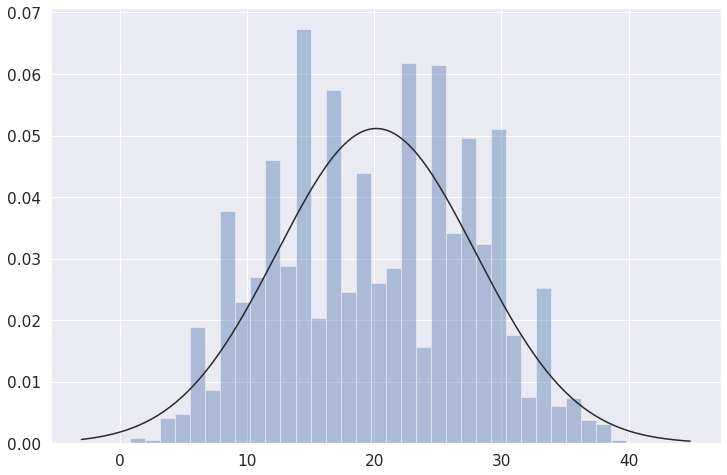

In [559]:
ax = sns.distplot(x = df11["temp"], fit=norm, kde=False)

In [560]:
####Join the train and test dataset:

f1 = df11.append(df2, sort=False)
f1.reset_index(inplace=True)
f1.drop('index',inplace=True,axis=1)
f1.shape
f1.head()

###Convert the categorical variables into one hot vector
from sklearn.preprocessing import OneHotEncoder

In [561]:
dummy=['season','weather','holiday','workingday','month','weekday']

In [562]:
f1 = pd.get_dummies(f1,columns = dummy)

In [462]:
hum = OneHotEncoder(handle_unknown='ignore' ,sparse =False)
hum.fit(np.array(f1["holiday"]).reshape(-1,1))
h =hum.transform(np.array(f1["holiday"]).reshape(-1,1))
enc = OneHotEncoder(handle_unknown='ignore' ,sparse = False)
enc.fit(np.array(f1["season"]).reshape(-1,1))
s =enc.transform(np.array(f1["season"]).reshape(-1,1))####train data

In [463]:
we = OneHotEncoder(handle_unknown='ignore',sparse =False)
we.fit(np.array(f1["weather"]).reshape(-1,1))
w =we.transform(np.array(f1["weather"]).reshape(-1,1))

wd = OneHotEncoder(handle_unknown='ignore',sparse =False)
wd.fit(np.array(f1["workingday"]).reshape(-1,1))
wdy =wd.transform(np.array(f1["workingday"]).reshape(-1,1))

wdy1 = OneHotEncoder(handle_unknown='ignore',sparse =False)
wdy1.fit(np.array(f1["weekday"]).reshape(-1,1))
wd1 =wdy1.transform(np.array(f1["weekday"]).reshape(-1,1))

hum1 = OneHotEncoder(handle_unknown='ignore' ,sparse =False)
hum1.fit(np.array(f1["month"]).reshape(-1,1))
h1 =hum1.transform(np.array(f1["month"]).reshape(-1,1))
h1.shape

(10704, 12)

In [564]:
df_train = f1[:df11.shape[0]]
df_test = f1[df11.shape[0]:]

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8526 entries, 0 to 8525
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   temp                                 8526 non-null   float64
 1   atemp                                8526 non-null   float64
 2   humidity                             8526 non-null   int64  
 3   windspeed                            8526 non-null   float64
 4   labels                               8526 non-null   int64  
 5   hour                                 8526 non-null   int64  
 6   date                                 8526 non-null   int64  
 7   season_Fall                          8526 non-null   uint8  
 8   season_Spring                        8526 non-null   uint8  
 9   season_Summer                        8526 non-null   uint8  
 10  season_Winter                        8526 non-null   uint8  
 11  weather_ Clear + Few clouds   

In [565]:
###splitiing of the data in to train and test for both train data and test data
from sklearn.model_selection import train_test_split
from scipy import sparse

In [566]:
X = df_train
X.shape

(8526, 38)

In [469]:
X.head()

,temp,atemp,humidity,windspeed,labels,hour,date,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,holiday_0,holiday_1,workingday_0,workingday_1,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,22.14,25.760,77,16.9979,504,19,2012,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,28.70,33.335,79,19.0012,5,4,2012,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,5.74,6.060,50,22.0028,139,9,2011,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,13.94,16.665,29,8.9981,209,16,2011,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,30.34,33.335,51,19.0012,184,13,2011,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [470]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8526 entries, 0 to 8525
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   temp                                 8526 non-null   float64
 1   atemp                                8526 non-null   float64
 2   humidity                             8526 non-null   int64  
 3   windspeed                            8526 non-null   float64
 4   labels                               8526 non-null   int64  
 5   hour                                 8526 non-null   int64  
 6   date                                 8526 non-null   int64  
 7   season_Fall                          8526 non-null   uint8  
 8   season_Spring                        8526 non-null   uint8  
 9   season_Summer                        8526 non-null   uint8  
 10  season_Winter                        8526 non-null   uint8  
 11  weather_ Clear + Few clouds   

In [567]:
X_train,X_test,Y_train,Y_test =train_test_split(X,df11["labels"],random_state = 0,test_size = 0.2)

In [568]:
from sklearn.ensemble import RandomForestRegressor
regressor5 = RandomForestRegressor(random_state = 0)
regressor5.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [569]:
from sklearn.metrics import mean_squared_error

In [570]:
Y_pred = regressor5.predict(X_test)

In [571]:
mse5 = mean_squared_error(Y_test,Y_pred)
import math
rmse5 = math.sqrt(mse5)

In [572]:
print(rmse5)

0.13645099691968132


In [573]:
from sklearn.ensemble import BaggingRegressor
regressor1 = BaggingRegressor(random_state=0)
regressor1.fit(X_train,Y_train)
Y_pred = regressor1.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
import math
rmse1 = math.sqrt(mse)
print(rmse1)

0.20289522241256278


In [574]:
from sklearn.svm import SVR
regressor2 = SVR()
regressor2.fit(X_train,Y_train)
Y_pred = regressor2.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
import math
rmse2 = math.sqrt(mse)
print(rmse2)

99.01348384508383


In [575]:
from sklearn.ensemble import AdaBoostRegressor
regressor3 = AdaBoostRegressor()
regressor3.fit(X_train,Y_train)
Y_pred = regressor3.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
import math
rmse3 = math.sqrt(mse)
print(rmse3)

11.715326325462758


In [576]:
from sklearn.neighbors import KNeighborsRegressor
regressor4 = KNeighborsRegressor()
regressor4.fit(X_train,Y_train)
Y_pred = regressor4.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
import math
rmse4 = math.sqrt(mse)
print(rmse4)

2.0161539884247506


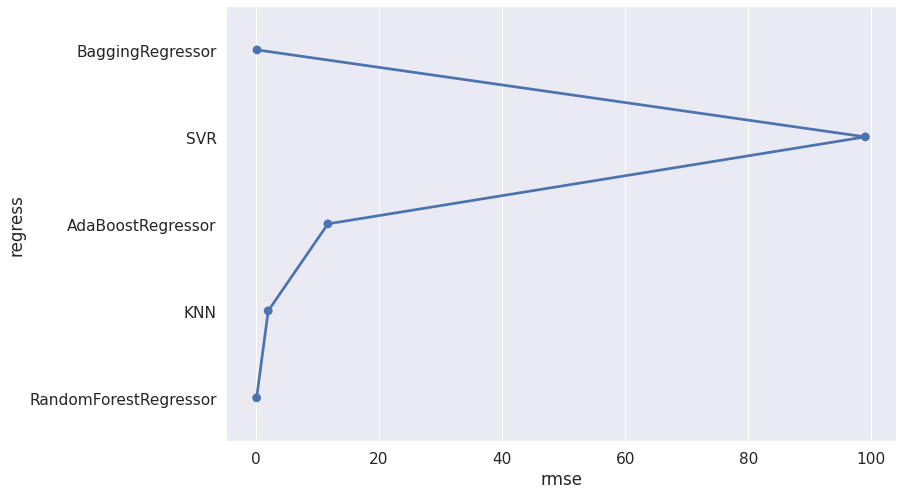

In [577]:
rmse = [rmse1,rmse2,rmse3,rmse4,rmse5]
regress = ["BaggingRegressor" ,"SVR", "AdaBoostRegressor","KNN","RandomForestRegressor"]
df1 = pd.DataFrame({"rmse" :rmse, "regress" : regress})
sns.pointplot(y ='regress', x ='rmse', data = df1)

In [578]:
param_grid=({"n_estimators":[10,20,30], "max_samples" :[10,40,100]})

In [579]:
from sklearn.model_selection import GridSearchCV

In [580]:
model = GridSearchCV(estimator=RandomForestRegressor(),param_grid= param_grid)

In [581]:
model.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [582]:
model.best_params_####Perform Hyper-parameter tuning on the best model using GridSearchCVand print the best parameters using model.best_params_

{'max_samples': 100, 'n_estimators': 30}

In [583]:
 y_pre = model.predict(X_test)

In [584]:
from sklearn.metrics import mean_squared_log_error

In [585]:
mqse = mean_squared_log_error(Y_test,y_pre)

In [586]:
print(mqse)

0.003949969636281966


In [587]:
###for test data
df2.shape

(2178, 13)

In [588]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      2178 non-null   category
 1   holiday     2178 non-null   category
 2   workingday  2178 non-null   category
 3   weather     2178 non-null   category
 4   temp        2178 non-null   float64 
 5   atemp       2178 non-null   float64 
 6   humidity    2178 non-null   int64   
 7   windspeed   2178 non-null   float64 
 8   labels      2178 non-null   int64   
 9   month       2178 non-null   object  
 10  weekday     2178 non-null   object  
 11  hour        2178 non-null   int64   
 12  date        2178 non-null   int64   
dtypes: category(4), float64(3), int64(4), object(2)
memory usage: 162.2+ KB


In [589]:
df_test.shape

(2178, 38)

In [590]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 8526 to 10703
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   temp                                 2178 non-null   float64
 1   atemp                                2178 non-null   float64
 2   humidity                             2178 non-null   int64  
 3   windspeed                            2178 non-null   float64
 4   labels                               2178 non-null   int64  
 5   hour                                 2178 non-null   int64  
 6   date                                 2178 non-null   int64  
 7   season_Fall                          2178 non-null   uint8  
 8   season_Spring                        2178 non-null   uint8  
 9   season_Summer                        2178 non-null   uint8  
 10  season_Winter                        2178 non-null   uint8  
 11  weather_ Clear + Few cloud

In [591]:
y_pre1 =model.predict(df_test)
y_pre1.shape

(2178,)

In [592]:
df_test1 = df2["labels"]
mse = mean_squared_log_error(y_pre1,df_test1)
import math
rmse1 = math.sqrt(mse)

In [593]:
print(rmse1)####Without splitting in to train and test and applying random forest regressor for the test data we get mean squared error log =0.069

0.06936526488209525


In [594]:
### for test data when we split in to train and test data and predicting it th value meand squared log error is 0.0034

X1_train,X1_test,Y1_train,Y1_test =train_test_split(df_test,df2["labels"],random_state = 10,test_size = 0.2)

In [595]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X1_train,Y1_train)
Y_pred1 = regressor.predict(X1_test)
mqse1 = mean_squared_log_error(Y1_test,Y_pred1)
print(mqse1)

7.605332918851735e-06


In [596]:
mse = mean_squared_error(Y1_test,Y_pred1)
import math
rmse = math.sqrt(mse)

In [597]:
model1 = GridSearchCV(estimator=RandomForestRegressor(),param_grid= param_grid)
model.fit(X1_train,Y1_train)
y_pre1 = model.predict(X1_test)

In [598]:
mqse1 = mean_squared_log_error(Y1_test,y_pre1)

In [599]:
print(mqse1)#### for test data mean_squared_log error

0.003496682043709092
